# State evolution for experimental testing of SPC
Interested in finding out how state evolves after MI, to see if they will end up in desirable cycling states

## Import packages

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use(["seaborn-dark"])
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["font.family"] = 'serif'

import numpy as np

import centrex_TlF
from centrex_TlF import UncoupledBasisState
from state_prep.electric_fields import ElectricField, E_field_ring, E_field_tanh
from state_prep.hamiltonians import SlowHamiltonian
from state_prep.magnetic_fields import MagneticField
from state_prep.simulator import Simulator
from state_prep.trajectory import Trajectory
from state_prep.utils import vector_to_state

### Evolution of J=1,2 in SPC

states can generally can be resolved bigger than 50V/cm, but above 200V/cm 

## Define molecule trajectory
Defining the molecule trajectory as a Trajectory object. Specifying the initial position as z = 50 mm, i.e. 50mm  after the center of the microwaves is, and on the axis of the beamline. Taking the beam velocity to be 200 m/s in the z-direction. The simulation ends when `zfin` is reached, 200 mm from the microwwaves.

In [2]:
trajectory = Trajectory(Rini = np.array((0,0,0)), Vini = np.array((0,0,184.)), zfin = 1e-3)

## Define electric field
Defining an electric field that is an approximation of what the molecules should see in the real experiment.

In [3]:
# #Define positions for centers of ring electrodes (in m)
# z1 = -85.725e-3
# z2 = 85.725e-3

# #Define voltages on the rings
# V1 = 5e3
# V2 = V1*0.07

# #Define a quickly decaying function to simulate adding shielding between state prep region and detection region
# decay_function = lambda R, Z0, l: np.exp(-0.5*((R[2]-Z0)*float(R[2]>Z0)/l)**2)
# decay_tanh = lambda R,Z0,l,z_shield: .5*(1-np.tanh((R[2]-Z0)/l))

# #Define electric field as function of position
# z_shield = 0.085
# l_decay = 0.02
# z0 = 116.4/1e3

# E_R = lambda R: ((E_field_ring(R, z0 = z1, V = V1)
#                         + E_field_ring(R, z0 = z2, V = V2))*decay_tanh(R,z0,l_decay,z_shield))

# electric_field = ElectricField(E_R)

In [4]:
# define a tanh fucntion for quickly decaying electric field

In [5]:
trajectory = Trajectory(Rini = np.array((0,0,0)), Vini = np.array((0,0,184.)), zfin = 2e-1)

V1 = 2e2
z1 = 0
decayl = 2e-2
E_R = lambda R: E_field_tanh(R, z0 = z1, V = V1, l = decayl  )
electric_field = ElectricField(E_R)

At decayl = 1$\mu$m, states like J=2 will start to get populated, regardless of the magnetic field

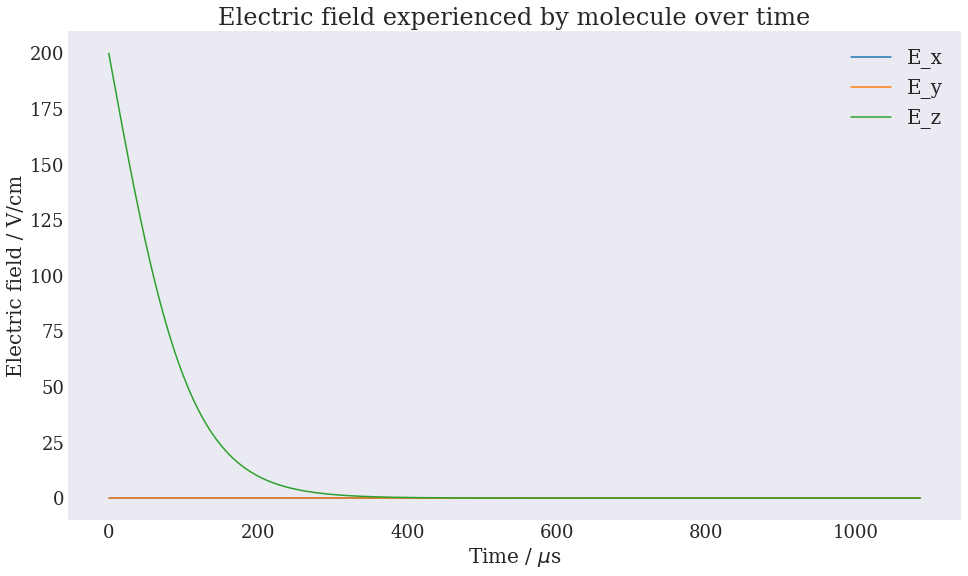

In [6]:
# Plot the electric field as a check:
electric_field.plot(trajectory)

## Define magnetic field
Define the magnetic field in Gauss. Using a constant field, either a nominal small field (so mF states become non-degenerate eigenstates of the Hamiltonian) or something resembilng Earth's magnetic field.

In [7]:
#B = np.array((0,0,1e-3))
B = np.array((0.2,0.45,0.1))
#B = np.array((0,0,0.6))
magnetic_field = MagneticField(lambda R: np.repeat(B.reshape(3,1),R.shape[1], axis = 1))

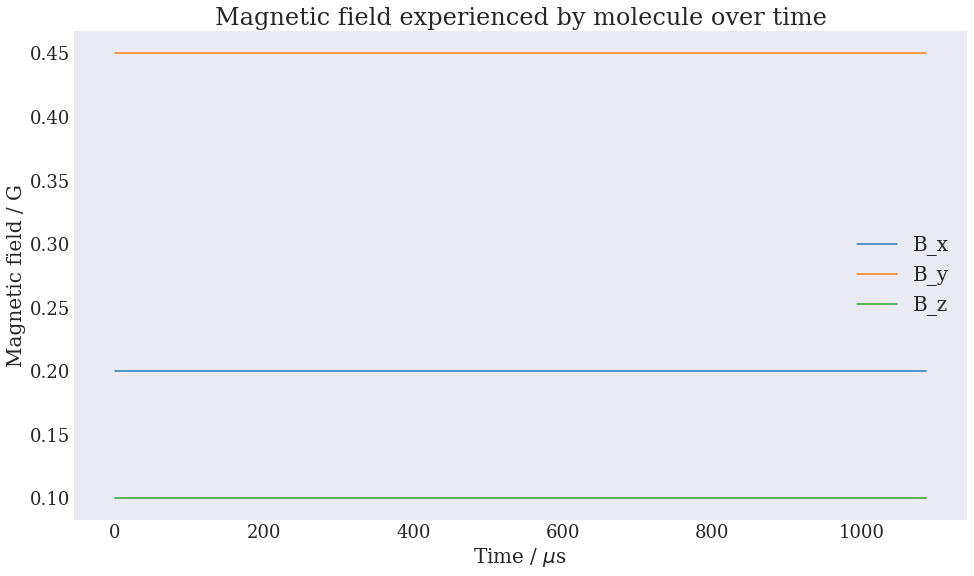

In [8]:
magnetic_field.plot(trajectory)

## Initial states
Define approximate initial states here.

In [9]:
#Define some useful approximate states

J1_up = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

J1_down = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

J2_singlet_0 = 1/np.sqrt(2) * (1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = +1, Omega = 0, electronic_state='X')
                              -1* UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X'))

J2_triplet_0 = 1/np.sqrt(2) * (1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = +1, Omega = 0, electronic_state='X')
                              +1* UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X'))

J2_up = (1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X'))

J2_1up = (1*UncoupledBasisState(J = 2, mJ = 1, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X'))

J2_2up = (1*UncoupledBasisState(J = 2, mJ = 2, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X'))
# J2_triplet_p = 1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X')

# J2_triplet_m = 1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = -1/2, P = +1, Omega = 0, electronic_state='X')

initial_states_approx = [J1_up, J1_down, J2_singlet_0, J2_triplet_0, J2_up, J2_1up, J2_2up]

In [10]:
# #Define some useful approximate states

# J1_singlet_0 = 1/np.sqrt(2) * (1*UncoupledBasisState(J = 1, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = -1, Omega = 0, electronic_state='X')
#                               -1* UncoupledBasisState(J = 1, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

# J1_triplet_0 = 1/np.sqrt(2) * (1*UncoupledBasisState(J = 1, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = -1, Omega = 0, electronic_state='X')
#                               +1* UncoupledBasisState(J = 1, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

# # J2_triplet_p = 1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X')

# # J2_triplet_m = 1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = -1/2, P = +1, Omega = 0, electronic_state='X')

# initial_states_approx = [J1_up, J1_down,J1_singlet_0,J1_triplet_0]

## Define slowly varying Hamiltonian
Define a Hamiltonian object that represents the slowly varying part of the Hamiltonian (i.e. everything except the microwaves). Using J = 0-3 here since we're interested in the time-evolution of J = 2 states; J = 1 and 3 are absolutely required since the electric field couples J = 2 to these, J = 0 is not strictly necessary. Since the Stark energies are << the rotational energies, we mostly just need the J of interest $\pm 1$.

In [11]:
Js = [0,1,2,3]
hamiltonian = SlowHamiltonian(Js, trajectory, electric_field, magnetic_field)

## Time-evolution
Next define a Simulator and use it to numerically integrate the Schroedinger equation to see how the states evolve as the electric field is ramped down. 

In [12]:
simulator = Simulator(trajectory, electric_field, magnetic_field, initial_states_approx, hamiltonian)

In [13]:
result = simulator.run()

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:13<00:00, 727.72it/s]


## Plot results

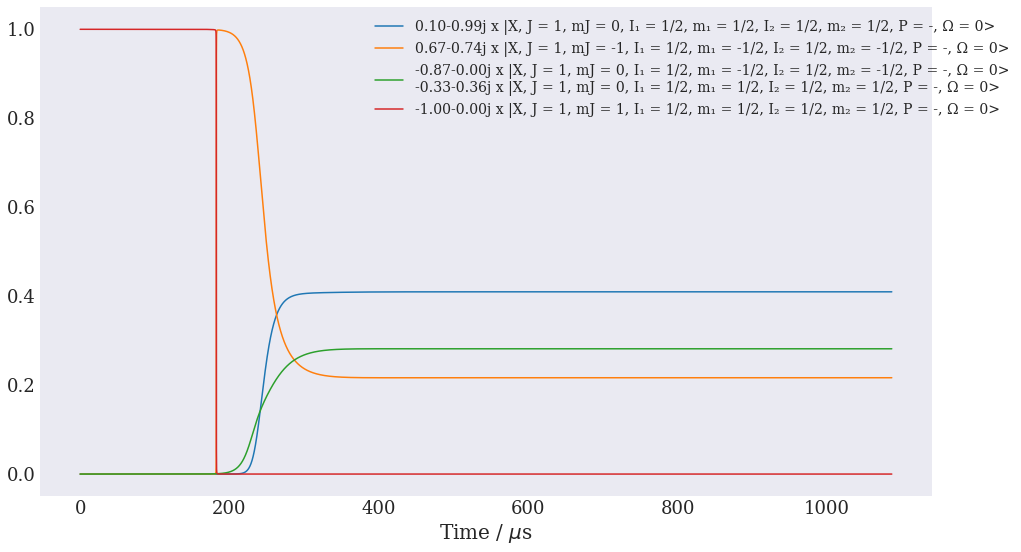

In [14]:
initial_state = result.initial_states[0]
large_prob_states = result.find_large_prob_states(initial_state, N=4)
fig, ax = plt.subplots()
result.plot_state_probabilities(large_prob_states, initial_state, ax = ax, tolerance = 0.4)
ax.legend(fontsize = 14, bbox_to_anchor = (1.1,1))

In [15]:
J2_singlet_0.print_state()

+0.7071+0.0000j x |X, J = 2, mJ = 0, I₁ = 1/2, m₁ = 1/2, I₂ = 1/2, m₂ = -1/2, P = +, Ω = 0>
-0.7071+0.0000j x |X, J = 2, mJ = 0, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = 1/2, P = +, Ω = 0>


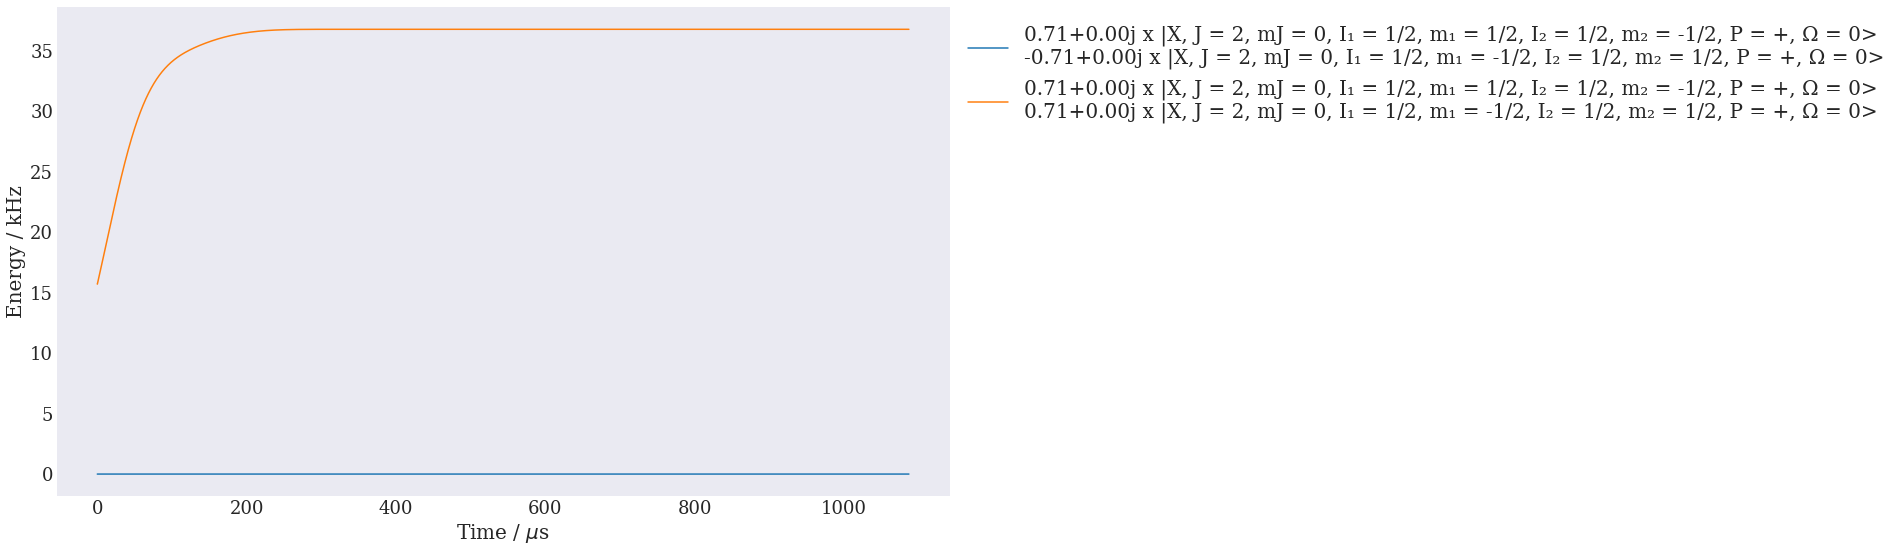

In [16]:
fig, ax = plt.subplots()
result.plot_state_energies([J2_singlet_0, J2_triplet_0], zero_state =J2_singlet_0, ax = ax)
ax.legend(bbox_to_anchor = (1,1))

## Convert final state vectors to coupled basis

In [17]:
QN = result.hamiltonian.QN

# Starting in singlet
final_state_vec_J1_up = result.psis[-1,0,:]
final_state_J1_up = (vector_to_state(final_state_vec_J1_up, QN).remove_small_components().transform_to_coupled()
                       .order_by_amp())
print("|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->")
final_state_J1_up.make_real().print_state(probabilities = True)


final_state_vec_J1_down = result.psis[-1,1,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN).remove_small_components().transform_to_coupled()
                         .order_by_amp())
print("\n|J = 1, mJ = 1, m1 = -1/2, m2 = 1/2 >  ->")
final_state_J1_down.make_real().print_state(probabilities = True)


final_state_vec_J2_singlet = result.psis[-1,2,:]
final_state_J2_singlet = (vector_to_state(final_state_vec_J2_singlet, QN).remove_small_components().transform_to_coupled()
                          .order_by_amp())
print("\n|J = 2, mJ = 0, S = 0, mS = 0 >  ->")
final_state_J2_singlet.make_real().print_state(probabilities = True)


final_state_vec_J2_triplet0 = result.psis[-1,3,:]
final_state_J2_triplet0 = (vector_to_state(final_state_vec_J2_triplet0, QN).remove_small_components().transform_to_coupled()
                          .order_by_amp())
print("\n|J = 2, mJ = 0, S = 1, mS = 0 >  ->")
final_state_J2_triplet0.make_real().print_state(probabilities = True)

final_state_vec_J2_up = result.psis[-1,4,:]
final_state_J2_up = (vector_to_state(final_state_vec_J2_up, QN).remove_small_components().transform_to_coupled()
                          .order_by_amp())
print("\n|J = 2, mJ = 0, S = 1, mS = 1 >  ->")
final_state_J2_up.make_real().print_state(probabilities = True)

final_state_vec_J2_1up = result.psis[-1,5,:]
final_state_J2_1up = (vector_to_state(final_state_vec_J2_1up, QN).remove_small_components().transform_to_coupled()
                          .order_by_amp())
print("\n|J = 2, mJ = 1, S = 1, mS = 1 >  ->")
final_state_J2_1up.make_real().print_state(probabilities = True)

final_state_vec_J2_2up = result.psis[-1,6,:]
final_state_J2_2up = (vector_to_state(final_state_vec_J2_2up, QN).remove_small_components().transform_to_coupled()
                          .order_by_amp())
print("\n|J = 2, mJ = 2, S = 1, mS = 1 >  ->")
final_state_J2_2up.make_real().print_state(probabilities = True)

# final_state_vec_J2_tripletp = result.psis[-1,4,:]
# final_state_J2_tripletp = (vector_to_state(final_state_vec_J2_tripletp, QN).remove_small_components().transform_to_coupled()
#                         .order_by_amp())
# print("\n|J = 2, mJ = 0, S = 1, mS = 1 >  ->")
# final_state_J2_tripletp.make_real().print_state()


# final_state_vec_J2_tripletm = result.psis[-1,5,:]
# final_state_J2_tripletm = (vector_to_state(final_state_vec_J2_tripletm, QN).remove_small_components().transform_to_coupled()
#                           .order_by_amp())
# print("\n|J = 2, mJ = 0, S = 1, mS = -1 >  ->")
# final_state_J2_tripletm.make_real().print_state()


|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->
+0.3503+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.2605+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.2367+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = 1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.0852+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = -2, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.0654+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = 2, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

|J = 1, mJ = 1, m1 = -1/2, m2 = 1/2 >  ->
+0.3925+0.0000j x |X, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.3778+0.0000j x |X, J = 1, F₁ = 1/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.2204+0.0000j x |X, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

|J = 2, mJ = 0, S = 0, mS = 0 >  ->
+0.7943+0.0000j x |X, J = 2, F₁ = 5/2, F = 2, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>
+0.0991+0.0000j x |X, J = 2, F₁ = 5/2, F = 2, mF = 1, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 

---

In [18]:
trajectory = Trajectory(Rini = np.array((0,0,0)), Vini = np.array((0,0,184.)), zfin = 2e-1)

V1 = 2e2
z1 = 0
decayl = 2e-2
E_R = lambda R: E_field_tanh(R, z0 = z1, V = V1, l = decayl  )
electric_field = ElectricField(E_R)

At decayl = 1$\mu$m, states like J=2 will start to get populated, regardless of the magnetic field

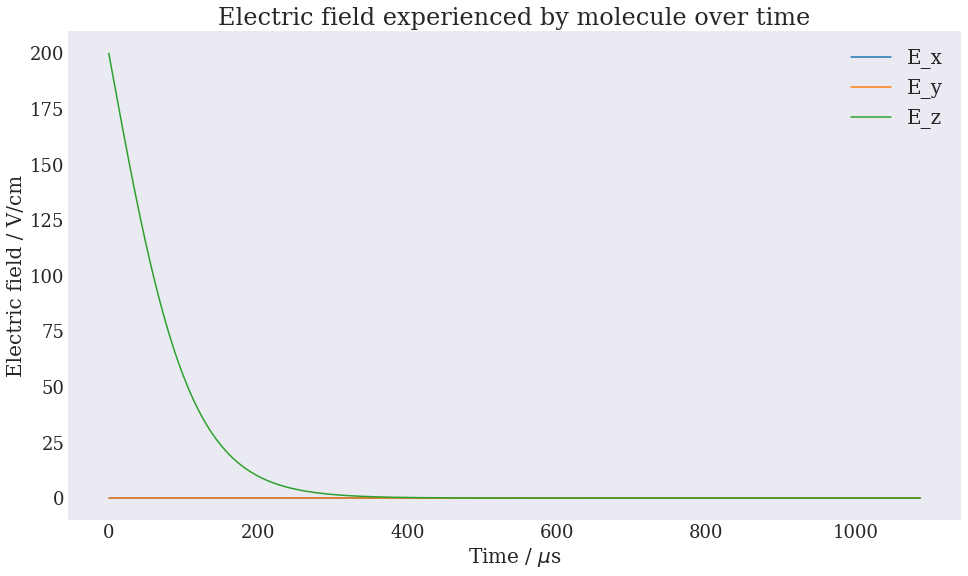

In [19]:
# Plot the electric field as a check:
electric_field.plot(trajectory)

## Define magnetic field
Define the magnetic field in Gauss. Using a constant field, either a nominal small field (so mF states become non-degenerate eigenstates of the Hamiltonian) or something resembilng Earth's magnetic field.

In [20]:
B = np.array((0.6,0,0))
#B = np.array((0.2,0.45,0.1))
#B = np.array((0,0,1))
magnetic_field = MagneticField(lambda R: np.repeat(B.reshape(3,1),R.shape[1], axis = 1))

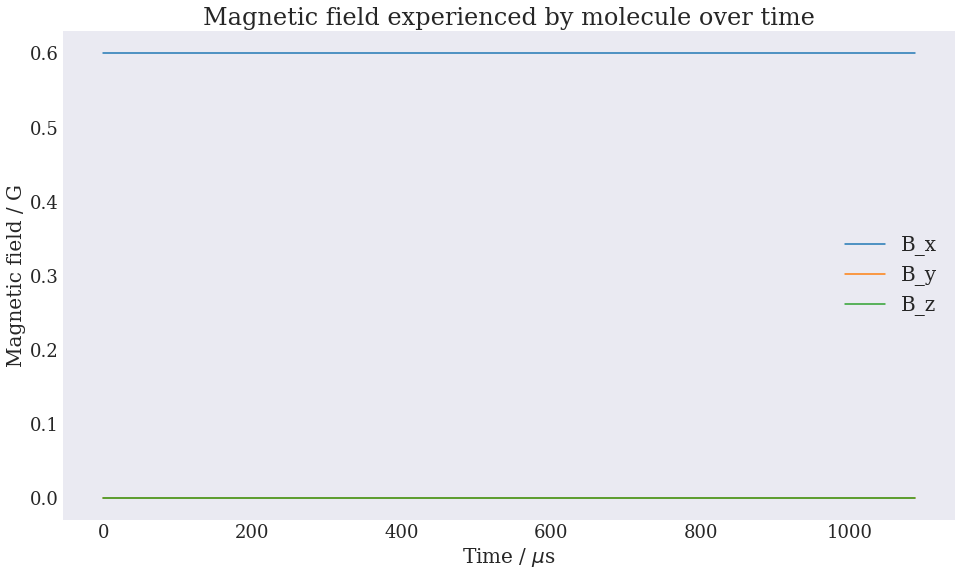

In [21]:
magnetic_field.plot(trajectory)

## Initial states
Define approximate initial states here.

In [22]:
#Define some useful approximate states

J1_up = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

J1_down = (1*UncoupledBasisState(J = 1, mJ = 1, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

J2_singlet_0 = 1/np.sqrt(2) * (1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = +1, Omega = 0, electronic_state='X')
                              -1* UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X'))

J2_triplet_0 = 1/np.sqrt(2) * (1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = +1, Omega = 0, electronic_state='X')
                              +1* UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X'))

# J2_triplet_p = 1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = 1/2, P = +1, Omega = 0, electronic_state='X')

# J2_triplet_m = 1*UncoupledBasisState(J = 2, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = -1/2, P = +1, Omega = 0, electronic_state='X')

initial_states_approx = [J1_up, J1_down, J2_singlet_0, J2_triplet_0]

## Define slowly varying Hamiltonian
Define a Hamiltonian object that represents the slowly varying part of the Hamiltonian (i.e. everything except the microwaves). Using J = 0-3 here since we're interested in the time-evolution of J = 2 states; J = 1 and 3 are absolutely required since the electric field couples J = 2 to these, J = 0 is not strictly necessary. Since the Stark energies are << the rotational energies, we mostly just need the J of interest $\pm 1$.

In [23]:
Js = [0,1,2,3]
hamiltonian = SlowHamiltonian(Js,trajectory, electric_field,magnetic_field)

## Time-evolution
Next define a Simulator and use it to numerically integrate the Schroedinger equation to see how the states evolve as the electric field is ramped down. 

In [24]:
simulator = Simulator(trajectory, electric_field, magnetic_field, initial_states_approx, hamiltonian)

In [25]:
result = simulator.run()

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:11<00:00, 836.39it/s]


## Plot results

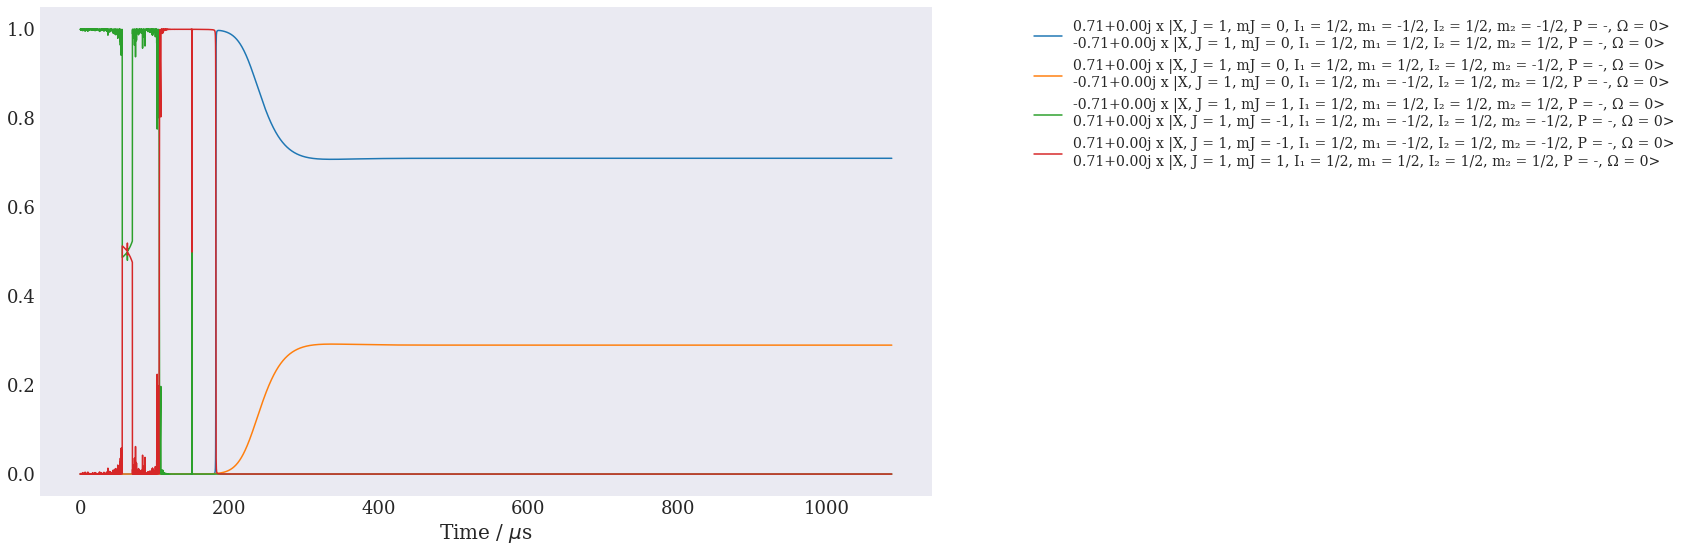

In [26]:
initial_state = result.initial_states[0]
large_prob_states = result.find_large_prob_states(initial_state, N=4)
fig, ax = plt.subplots()
result.plot_state_probabilities(large_prob_states, initial_state, ax = ax, tolerance = 0.4)
ax.legend(fontsize = 14, bbox_to_anchor = (1.1,1))

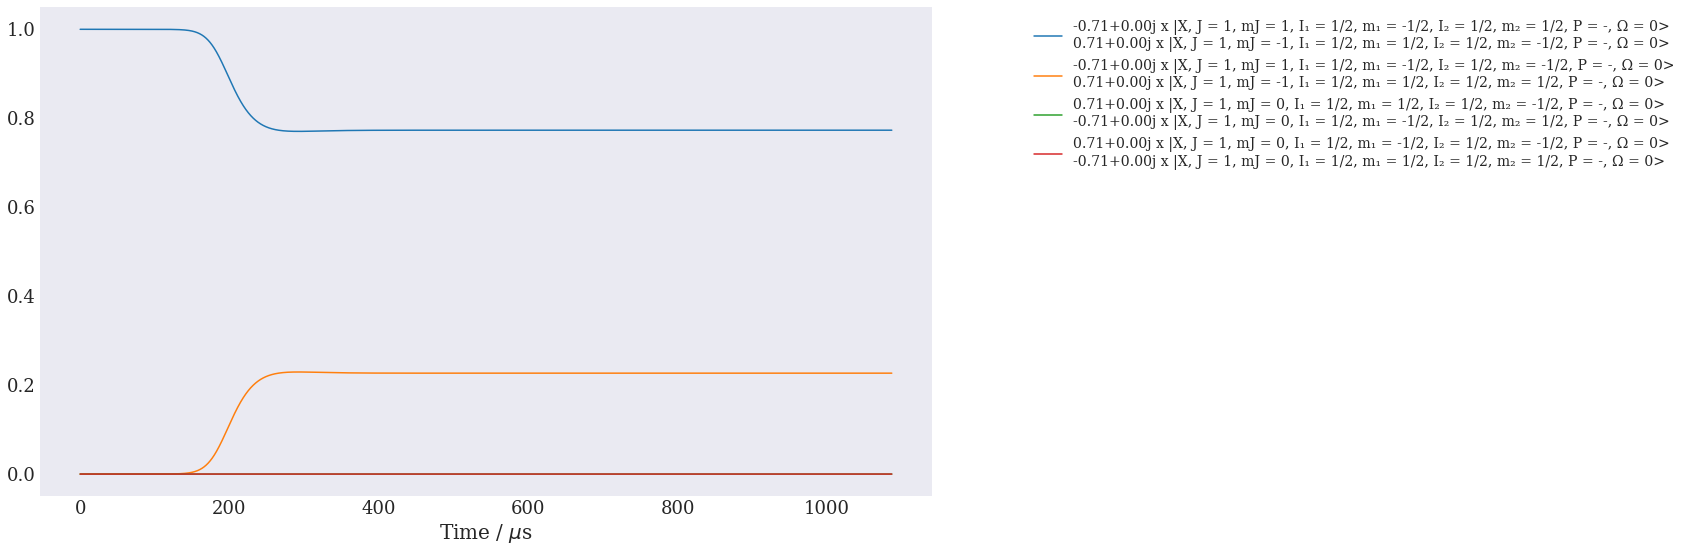

In [27]:
initial_state = result.initial_states[1]
large_prob_states = result.find_large_prob_states(initial_state, N=4)
fig, ax = plt.subplots()
result.plot_state_probabilities(large_prob_states, initial_state, ax = ax, tolerance = 0.4)
ax.legend(fontsize = 14, bbox_to_anchor = (1.1,1))

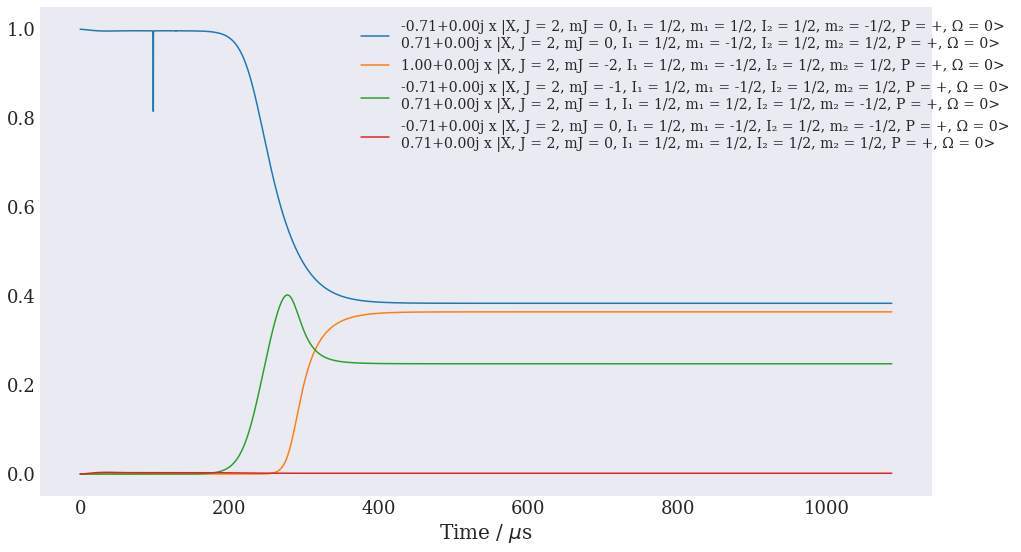

In [28]:
initial_state = result.initial_states[2]
large_prob_states = result.find_large_prob_states(initial_state, N=4)
fig, ax = plt.subplots()
result.plot_state_probabilities(large_prob_states, initial_state, ax = ax, tolerance = 0.4)
ax.legend(fontsize = 14, bbox_to_anchor = (1.1,1))

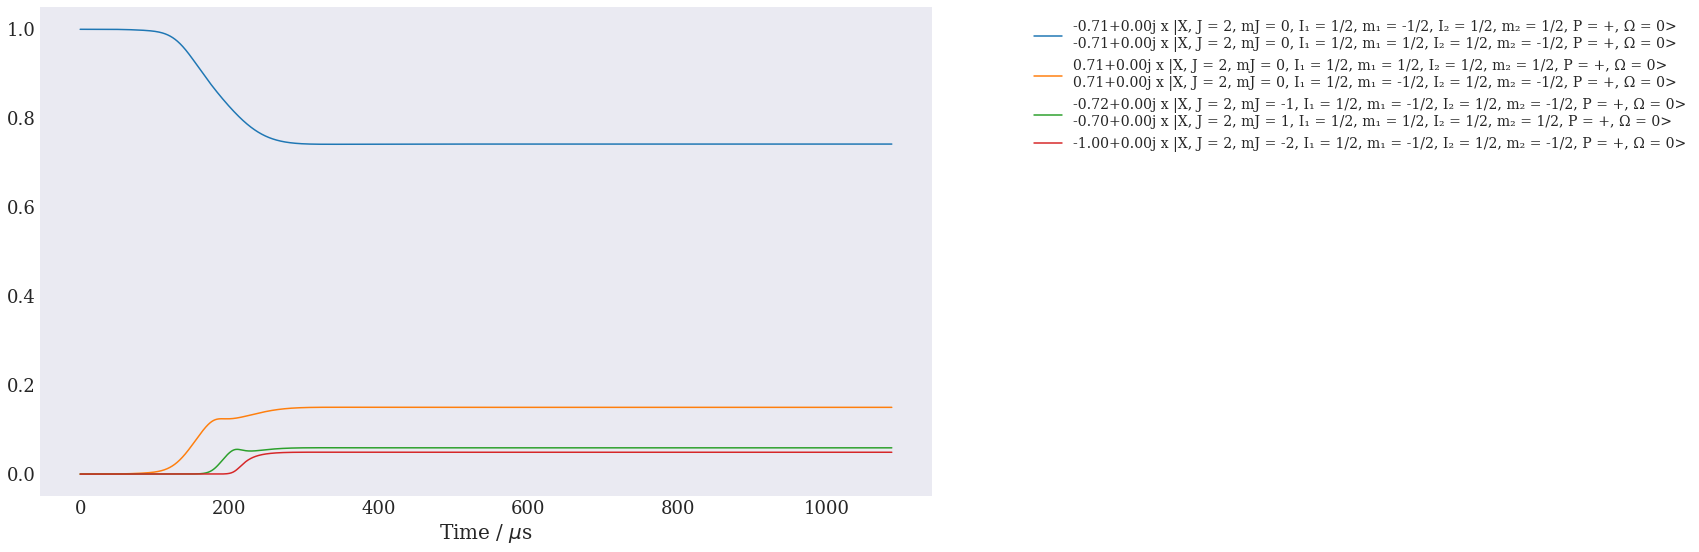

In [29]:
initial_state = result.initial_states[3]
large_prob_states = result.find_large_prob_states(initial_state, N=4)
fig, ax = plt.subplots()
result.plot_state_probabilities(large_prob_states, initial_state, ax = ax, tolerance = 0.4)
ax.legend(fontsize = 14, bbox_to_anchor = (1.1,1))

## Convert final state vectors to coupled basis

In [30]:
QN = result.hamiltonian.QN

# Starting in singlet
final_state_vec_J1_up = result.psis[-1,0,:]
final_state_J1_up = (vector_to_state(final_state_vec_J1_up, QN).remove_small_components().transform_to_coupled()
                       .order_by_amp())
print("|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->")
final_state_J1_up.make_real().print_state(probabilities = True)


final_state_vec_J1_down = result.psis[-1,1,:]
final_state_J1_down = (vector_to_state(final_state_vec_J1_down, QN).remove_small_components().transform_to_coupled()
                         .order_by_amp())
print("\n|J = 1, mJ = 1, m1 = -1/2, m2 = 1/2 >  ->")
final_state_J1_down.make_real().print_state(probabilities = True)


final_state_vec_J2_singlet = result.psis[-1,2,:]
final_state_J2_singlet = (vector_to_state(final_state_vec_J2_singlet, QN).remove_small_components().transform_to_coupled()
                          .order_by_amp())
print("\n|J = 2, mJ = 0, S = 0, mS = 0 >  ->")
final_state_J2_singlet.make_real().print_state(probabilities = True)


final_state_vec_J2_triplet0 = result.psis[-1,3,:]
final_state_J2_triplet0 = (vector_to_state(final_state_vec_J2_triplet0, QN).remove_small_components().transform_to_coupled()
                          .order_by_amp())
print("\n|J = 2, mJ = 0, S = 1, mS = 0 >  ->")
final_state_J2_triplet0.make_real().print_state(probabilities = True)


# final_state_vec_J2_tripletp = result.psis[-1,4,:]
# final_state_J2_tripletp = (vector_to_state(final_state_vec_J2_tripletp, QN).remove_small_components().transform_to_coupled()
#                         .order_by_amp())
# print("\n|J = 2, mJ = 0, S = 1, mS = 1 >  ->")
# final_state_J2_tripletp.make_real().print_state()


# final_state_vec_J2_tripletm = result.psis[-1,5,:]
# final_state_J2_tripletm = (vector_to_state(final_state_vec_J2_tripletm, QN).remove_small_components().transform_to_coupled()
#                           .order_by_amp())
# print("\n|J = 2, mJ = 0, S = 1, mS = -1 >  ->")
# final_state_J2_tripletm.make_real().print_state()


|J = 1, mJ = 1, m1 = 1/2, m2 = 1/2 > ->
+0.2921+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = 1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.2905+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.2083+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = 2, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.2063+0.0000j x |X, J = 1, F₁ = 3/2, F = 2, mF = -2, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

|J = 1, mJ = 1, m1 = -1/2, m2 = 1/2 >  ->
+0.3924+0.0000j x |X, J = 1, F₁ = 1/2, F = 1, mF = 1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.3924+0.0000j x |X, J = 1, F₁ = 1/2, F = 1, mF = -1, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>
+0.2074+0.0000j x |X, J = 1, F₁ = 1/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

|J = 2, mJ = 0, S = 0, mS = 0 >  ->
+0.7086+0.0000j x |X, J = 2, F₁ = 5/2, F = 2, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>
+0.1379+0.0000j x |X, J = 2, F₁ = 5/2, F = 2, mF = -1, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>
+0.1379+0.0000j x |X, J = 2, F₁ = 5/2, F = 2, mF = 1, I₁ = 1/2, I₂ = 1/2, P = +, Ω =

## Plot energies

In [32]:
J1_down.print_state()

+1.0000+0.0000j x |X, J = 1, mJ = 1, I₁ = 1/2, m₁ = -1/2, I₂ = 1/2, m₂ = 1/2, P = -, Ω = 0>


In [33]:
J1_singlet_0 = 1/np.sqrt(2) * (1*UncoupledBasisState(J = 1, mJ = 0, I1 = 1/2, m1 = 1/2, I2 = 1/2, m2 = -1/2, P = -1, Omega = 0, electronic_state='X')
                              -1* UncoupledBasisState(J = 1, mJ = 0, I1 = 1/2, m1 = -1/2, I2 = 1/2, m2 = 1/2, P = -1, Omega = 0, electronic_state='X'))

In [34]:
result.energies.shape

(10000, 64)

In [36]:
H = result.hamiltonian
H_t = H.get_H_t_func()

In [37]:
import centrex_TlF

In [38]:
index_J1_down = centrex_TlF.states.find_state_idx_from_state(H_t(0), J1_down, QN)

In [39]:
index_J1_singlet_0 = centrex_TlF.states.find_state_idx_from_state(H_t(0), J1_singlet_0, QN)

In [40]:
index_J1_singlet_0

15

In [41]:
energies_J1_down = result.energies[:,index_J1_down]
energies_J1_singlet = result.energies[:,index_J1_down]

In [46]:
a = electric_field.get_E_t_func(R_t)

NameError: name 'R_t' is not defined

<bound method ElectricField.get_E_t_func of ElectricField()>

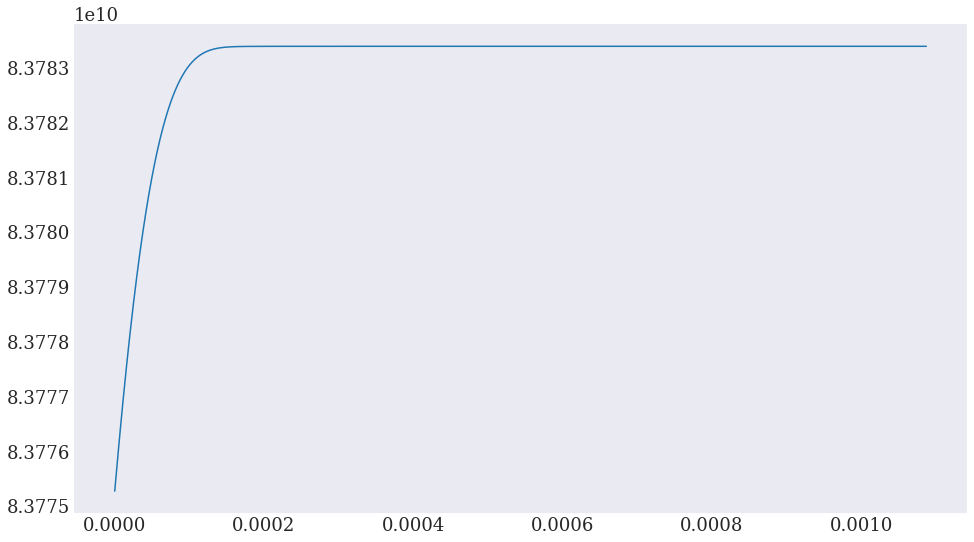

In [42]:
fig, ax = plt.subplots()
ax.plot(result.t_array, energies_J1_down)